# K-Means for Hearing Threshold Data Clustering - 40 Year or Above

`Each participant's both ears are treated as if they were two participants.`

In [107]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [108]:
# Load the data
file_path = "../data/nhanes_1520_age.csv"
data = pd.read_csv(file_path)
data = data[data['RIDAGEYR'] >= 40]
data.set_index('SEQN', inplace=True)
data.head()

,AUXU500R,AUXU1K1R,AUXU2KR,AUXU3KR,AUXU4KR,AUXU6KR,AUXU8KR,AUXU500L,AUXU1K1L,AUXU2KL,AUXU3KL,AUXU4KL,AUXU6KL,AUXU8KL,RIDAGEYR
SEQN,,,,,,,,,,,,,,,
83732,10.0,5.0,5.0,20.0,30.0,25.0,50.0,5.0,5.0,5.0,35.0,50.0,50.0,55.0,62
83733,10.0,15.0,40.0,55.0,60.0,55.0,65.0,5.0,20.0,50.0,55.0,60.0,55.0,60.0,53
83735,25.0,25.0,30.0,20.0,40.0,40.0,55.0,15.0,25.0,30.0,30.0,45.0,60.0,50.0,56
83736,10.0,10.0,10.0,15.0,10.0,15.0,20.0,15.0,10.0,15.0,25.0,15.0,25.0,20.0,42
83744,20.0,10.0,15.0,20.0,10.0,30.0,40.0,20.0,15.0,10.0,15.0,40.0,35.0,30.0,56


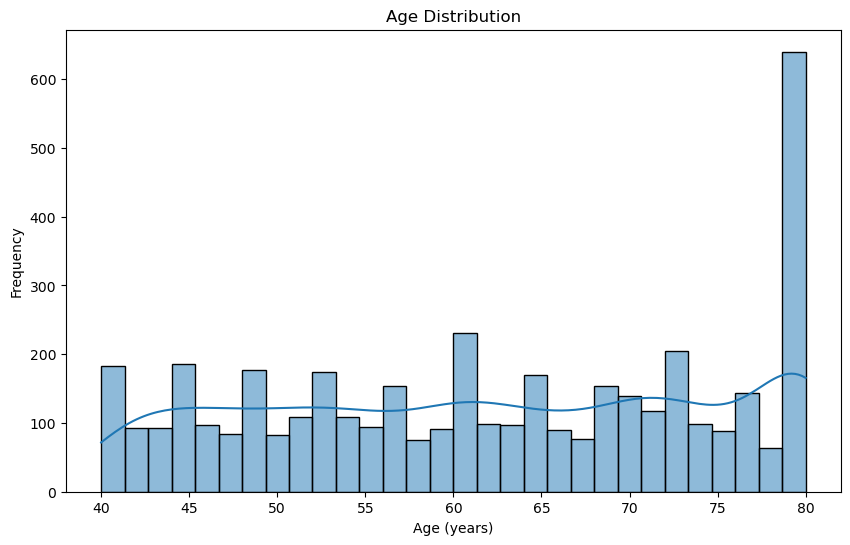

In [109]:
# Check the age distribution in the column 'RIDAGEYR'
plt.figure(figsize=(10, 6))
sns.histplot(data['RIDAGEYR'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

In [110]:
# Select the columns for right ear measurements

right_ear_columns = ['AUXU500R', 'AUXU1K1R', 'AUXU2KR', 'AUXU3KR', 'AUXU4KR', 'AUXU6KR', 'AUXU8KR']
right_ear_data = data[right_ear_columns]
right_ear_data.columns = ['500 Hz', '1 kHz', '2 kHz', '3 kHz', '4 kHz', '6 kHz', '8 kHz']

# Select the columns for left ear measurements

left_ear_columns = ['AUXU500L', 'AUXU1K1L', 'AUXU2KL', 'AUXU3KL', 'AUXU4KL', 'AUXU6KL', 'AUXU8KL']
left_ear_data = data[left_ear_columns]
left_ear_data.columns = ['500 Hz', '1 kHz', '2 kHz', '3 kHz', '4 kHz', '6 kHz', '8 kHz']

# Concatenate the right and left ear data

ear_data = pd.concat([right_ear_data, left_ear_data], axis=0)

# Change the column names to be more descriptive

ear_data

,500 Hz,1 kHz,2 kHz,3 kHz,4 kHz,6 kHz,8 kHz
SEQN,,,,,,,
83732,10.0,5.0,5.0,20.0,30.0,25.0,50.0
83733,10.0,15.0,40.0,55.0,60.0,55.0,65.0
83735,25.0,25.0,30.0,20.0,40.0,40.0,55.0
83736,10.0,10.0,10.0,15.0,10.0,15.0,20.0
83744,20.0,10.0,15.0,20.0,10.0,30.0,40.0
...,...,...,...,...,...,...,...
124756,10.0,15.0,10.0,25.0,25.0,25.0,40.0
124784,45.0,50.0,50.0,50.0,50.0,45.0,80.0
124799,20.0,40.0,45.0,45.0,60.0,85.0,666.0


In [111]:
# Process missing values
cleaned_ear_data = ear_data.replace({888: np.nan, 666: np.nan, '.': np.nan}, inplace=False)
cleaned_ear_data = cleaned_ear_data.dropna(inplace=False)
# cleaned_ear_data.reset_index(drop=True, inplace=True)

cleaned_ear_data

,500 Hz,1 kHz,2 kHz,3 kHz,4 kHz,6 kHz,8 kHz
SEQN,,,,,,,
83732,10.0,5.0,5.0,20.0,30.0,25.0,50.0
83733,10.0,15.0,40.0,55.0,60.0,55.0,65.0
83735,25.0,25.0,30.0,20.0,40.0,40.0,55.0
83736,10.0,10.0,10.0,15.0,10.0,15.0,20.0
83744,20.0,10.0,15.0,20.0,10.0,30.0,40.0
...,...,...,...,...,...,...,...
124750,20.0,5.0,15.0,30.0,40.0,40.0,35.0
124756,10.0,15.0,10.0,25.0,25.0,25.0,40.0
124784,45.0,50.0,50.0,50.0,50.0,45.0,80.0


In [112]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_ear_data)

scaled_data

array([[-0.40484594, -0.8593103 , -0.91089228, ..., -0.09052087,
        -0.60237647,  0.28931381],
       [-0.40484594, -0.11392058,  1.13160071, ...,  1.29356618,
         0.77133881,  0.90270328],
       [ 0.80050602,  0.63146913,  0.54803128, ...,  0.37084148,
         0.08448117,  0.49377697],
       ...,
       [ 2.40764197,  2.49494342,  1.71517013, ...,  0.83220383,
         0.31343372,  1.51609275],
       [ 1.604074  ,  1.00416399, -0.32732285, ..., -0.32120204,
         0.77133881,  0.69824012],
       [-0.80662993, -0.11392058, -0.32732285, ...,  0.83220383,
         1.00029136,  1.3116296 ]])

# K-Means with n clusters

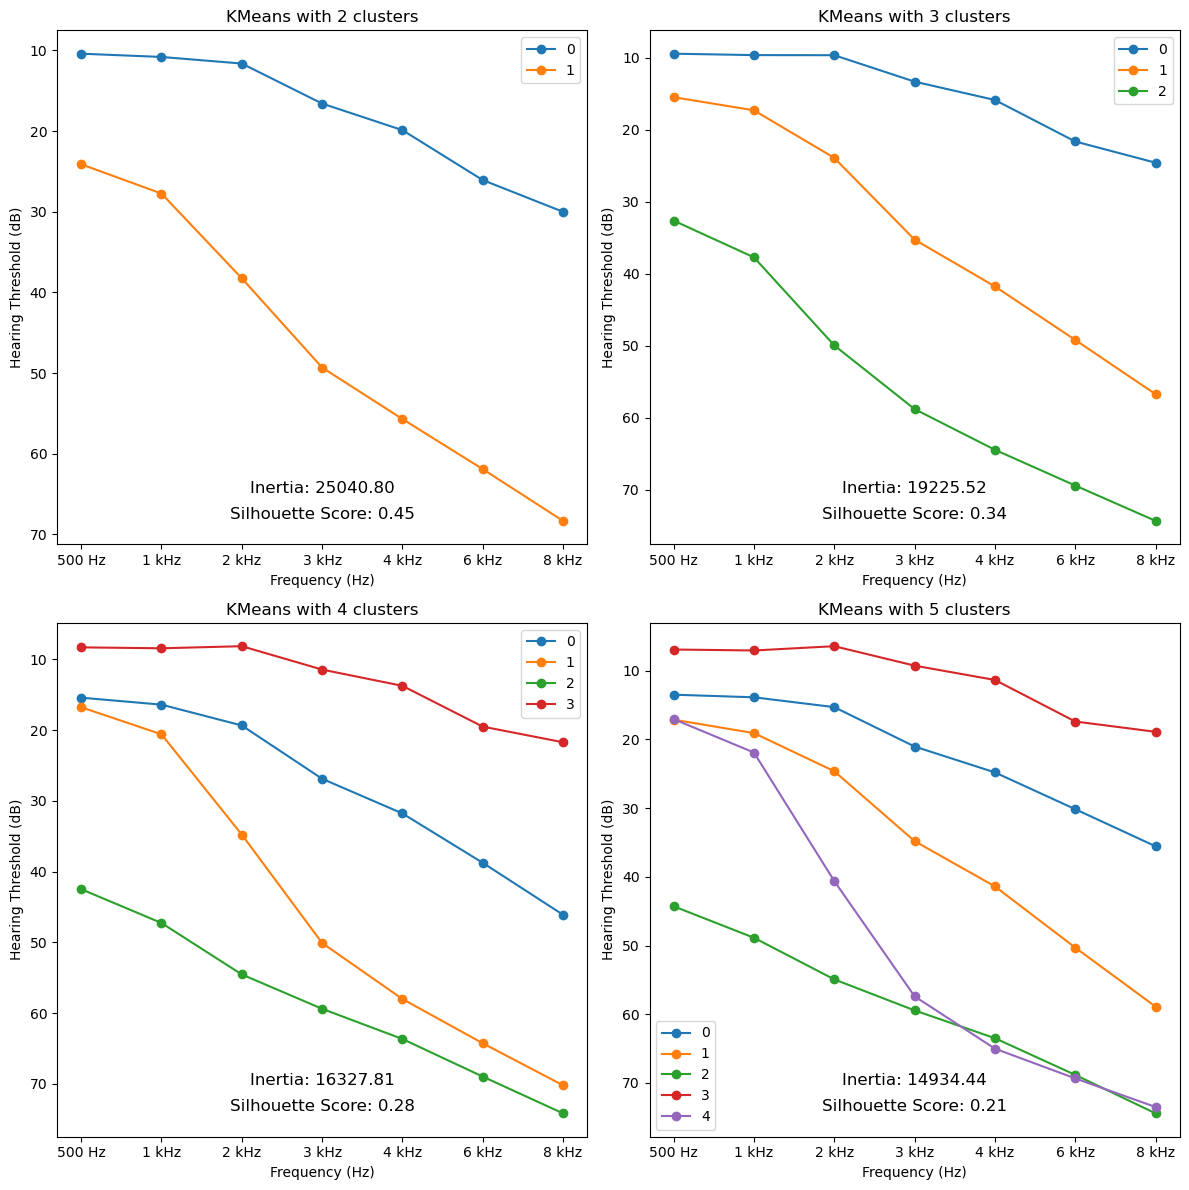

In [113]:
# Fit the K-Means algorithm with n clusters = 2, 3, 4, 5

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for i in range(2, 6):
    # Initialize the KMeans object
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(scaled_data)

    # Extract the centroids
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    centroids_df = pd.DataFrame(centroids, columns=cleaned_ear_data.columns)

    # Plot the line plot
    row = (i - 2) // 2
    col = (i - 2) % 2
    ax[row, col].plot(centroids_df.T, marker='o')
    ax[row, col].set_title(f'KMeans with {i} clusters')
    ax[row, col].set_xlabel('Frequency (Hz)')
    ax[row, col].set_ylabel('Hearing Threshold (dB)')
    ax[row, col].invert_yaxis()
    ax[row, col].legend(range(i))

    # Annotate the Silhouette Score
    ax[row, col].annotate(f'Silhouette Score: {silhouette_score(scaled_data, kmeans.labels_):.2f}', 
                          xy=(0.5, 0.05), xycoords='axes fraction', ha='center', fontsize=12)
    
    # Annotate the Inertia
    ax[row, col].annotate(f'Inertia: {kmeans.inertia_:.2f}', 
                          xy=(0.5, 0.10), xycoords='axes fraction', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Examine the Age Distribution

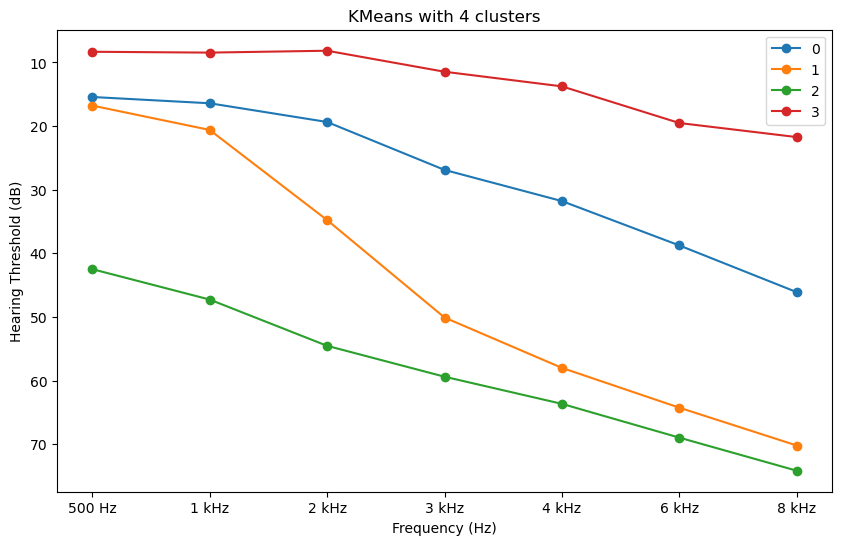

In [114]:
# Extract labels for 4 clusters

kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(scaled_data)
labels = kmeans.labels_

# Plot 4 clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=ear_data.columns)
plt.figure(figsize=(10, 6))
plt.plot(centroids_df.T, marker='o')
plt.title('KMeans with 4 clusters')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Hearing Threshold (dB)')
plt.gca().invert_yaxis()
plt.legend(range(4))
plt.show()

# Add the labels to the cleaned ear data

cleaned_ear_data['Cluster_Raw'] = labels

# Left join the age data from the data DataFrame

age_data = data[['RIDAGEYR']]
merged_data = cleaned_ear_data.merge(age_data, on='SEQN', how='left')

# Generate a table of age distribution by 4 clusters
summarized_table = merged_data.groupby('Cluster_Raw')['RIDAGEYR'].describe()

In [116]:
# Display the summarized table
summarized_table.rename(index={0: 'Blue', 1: 'Orange', 2: 'Green', 3: 'Red'}, inplace=False).sort_values(by='mean', ascending=True)

,count,mean,std,min,25%,50%,75%,max
Cluster_Raw,,,,,,,,
Red,2992.0,52.470588,9.442030,40.0,45.0,51.0,59.0,80.0
Blue,2258.0,62.756422,10.511930,40.0,55.0,63.0,71.0,80.0
Orange,1356.0,69.432891,9.365750,40.0,63.0,71.0,78.0,80.0
Green,611.0,71.193126,10.062364,40.0,65.0,75.0,80.0,80.0


# K-Means for Percentile

In [117]:
# Replace original values with percentiles
ranked_ear_data = cleaned_ear_data.rank(method='average', pct=True).drop(columns='Cluster_Raw')
ranked_ear_data

,500 Hz,1 kHz,2 kHz,3 kHz,4 kHz,6 kHz,8 kHz
SEQN,,,,,,,
83732,0.392060,0.163226,0.162394,0.436262,0.535887,0.341208,0.607247
83733,0.392060,0.553138,0.859291,0.879798,0.870098,0.755785,0.768740
83735,0.837398,0.797769,0.754746,0.436262,0.665720,0.586324,0.657960
83736,0.392060,0.356658,0.312595,0.320285,0.156644,0.137384,0.216711
83744,0.742552,0.356658,0.461203,0.436262,0.156644,0.437509,0.507552
...,...,...,...,...,...,...,...
124750,0.742552,0.163226,0.461203,0.619856,0.665720,0.586324,0.446169
124756,0.392060,0.553138,0.312595,0.535472,0.458085,0.341208,0.507552
124784,0.968200,0.969586,0.923445,0.836566,0.775807,0.647915,0.923168


In [118]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ranked_ear_data)

scaled_data

array([[-0.37921632, -1.18091154, -1.17694081, ...,  0.12443623,
        -0.55184021,  0.37200386],
       [-0.37921632,  0.18605065,  1.252039  , ...,  1.28552008,
         0.88828705,  0.93253456],
       [ 1.18435166,  1.04368097,  0.88765581, ...,  0.57548746,
         0.29962541,  0.54802637],
       ...,
       [ 1.64359503,  1.64603815,  1.47564327, ...,  0.95794231,
         0.5135748 ,  1.46853754],
       [ 1.50567607,  1.26495008, -0.13546652, ..., -0.14585755,
         0.88828705,  0.7336676 ],
       [-1.10675705,  0.18605065, -0.13546652, ...,  0.95794231,
         1.0726349 ,  1.31559995]])

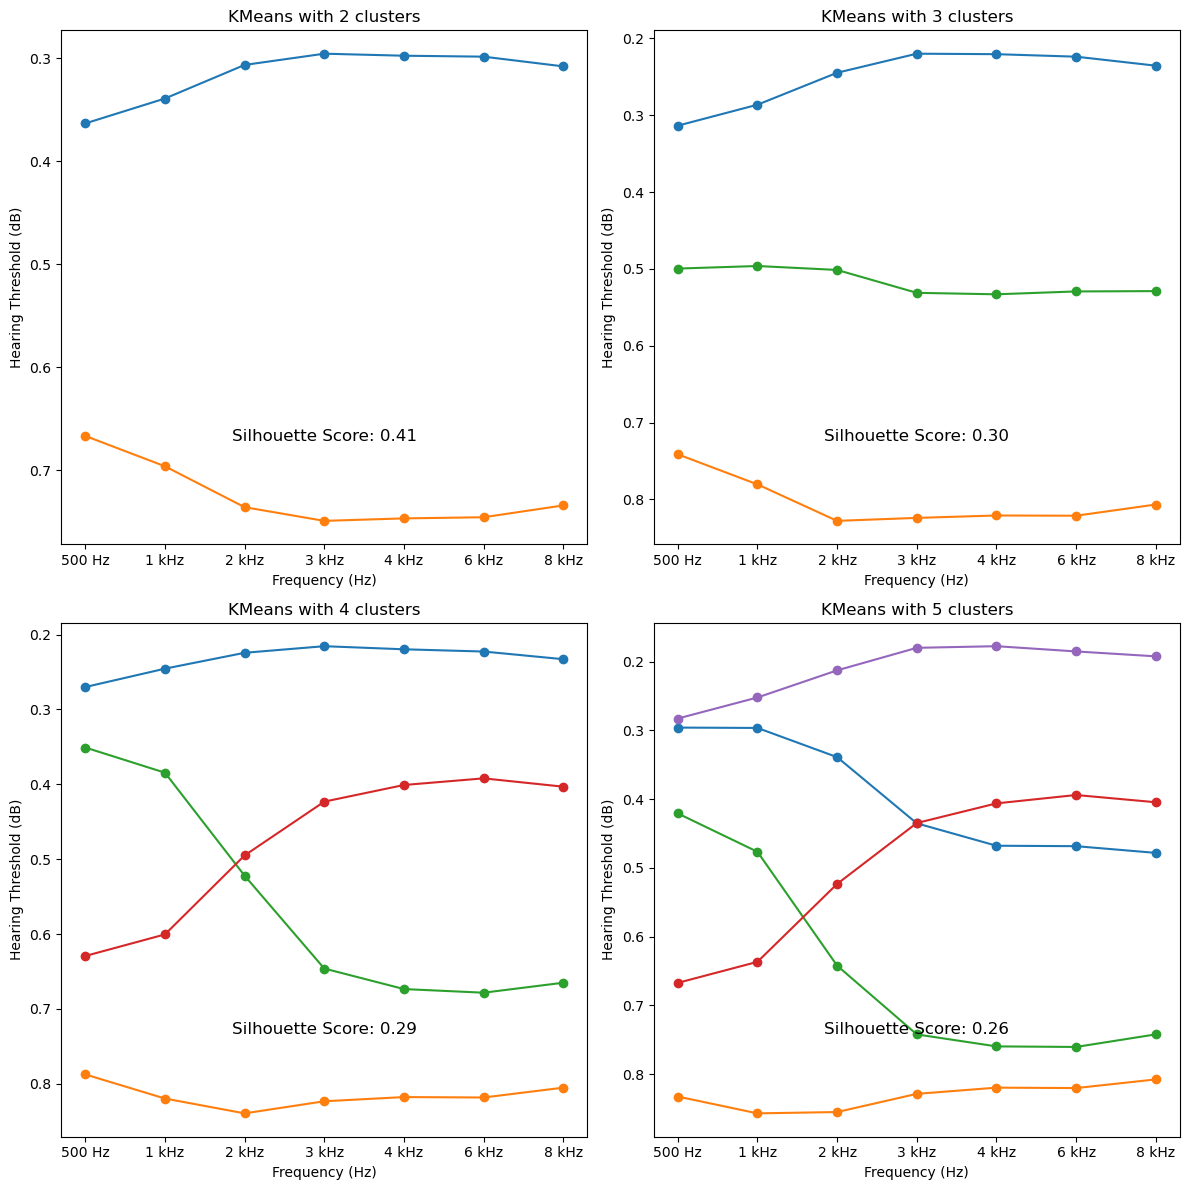

In [119]:
# Fit the K-Means algorithm with n clusters = 2, 3, 4, 5

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for i in range(2, 6):
    # Initialize the KMeans object
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(ranked_ear_data)

    # Extract the centroids
    # centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    centroids = kmeans.cluster_centers_
    centroids_df = pd.DataFrame(centroids, columns=ear_data.columns)

    # Plot the line plot
    row = (i - 2) // 2
    col = (i - 2) % 2
    ax[row, col].plot(centroids_df.T, marker='o')
    ax[row, col].set_title(f'KMeans with {i} clusters')
    ax[row, col].set_xlabel('Frequency (Hz)')
    ax[row, col].set_ylabel('Hearing Threshold (dB)')
    ax[row, col].invert_yaxis()

    # Annotate the Silhouette Score
    ax[row, col].annotate(f'Silhouette Score: {silhouette_score(scaled_data, kmeans.labels_):.2f}', 
                          xy=(0.5, 0.20), xycoords='axes fraction', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

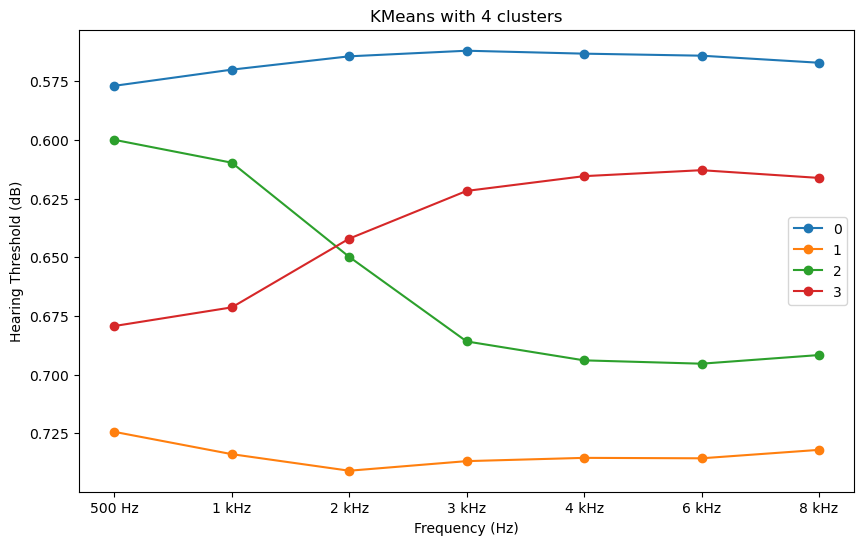

In [120]:
# Extract labels for 4 clusters

kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(ranked_ear_data)
labels = kmeans.labels_

# Plot 4 clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=ear_data.columns)
plt.figure(figsize=(10, 6))
plt.plot(centroids_df.T, marker='o')
plt.title('KMeans with 4 clusters')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Hearing Threshold (dB)')
plt.gca().invert_yaxis()
plt.legend(range(4))
plt.show()

# Add the labels to the cleaned ear data

cleaned_ear_data['Cluster_Pct'] = labels

# Left join the age data from the data DataFrame

age_data = data[['RIDAGEYR']]
merged_data = cleaned_ear_data.merge(age_data, on='SEQN', how='left')

# Generate a table of age distribution by 4 clusters
summarized_table = merged_data.groupby('Cluster_Pct')['RIDAGEYR'].describe()

In [121]:
# Display the summarized table
summarized_table.rename(index={0: 'Blue', 1: 'Orange', 2: 'Green', 3: 'Red'}, inplace=False).sort_values(by='mean', ascending=True)

,count,mean,std,min,25%,50%,75%,max
Cluster_Pct,,,,,,,,
Blue,2347.0,51.399659,8.983055,40.0,44.0,50.0,57.0,80.0
Red,1659.0,59.417119,10.424620,40.0,51.0,60.0,68.0,80.0
Green,1369.0,63.915997,10.486114,40.0,57.0,65.0,72.0,80.0
Orange,1842.0,70.378393,9.529544,40.0,64.0,73.0,80.0,80.0


In [122]:
crosstab = pd.crosstab(cleaned_ear_data['Cluster_Raw'], cleaned_ear_data['Cluster_Pct'])
crosstab

Cluster_Pct,0,1,2,3
Cluster_Raw,,,,
0,14,256,952,1036
1,0,975,381,0
2,0,611,0,0
3,2333,0,36,623
